In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cluster import DBSCAN
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , f1_score ,recall_score , precision_score,accuracy_score ,confusion_matrix ,roc_curve, auc, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.tree import DecisionTreeClassifier
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential

In [2]:
hyper = pd.read_csv('megringaftertransfer.csv').drop('id',axis=1)

print(hyper.head())
print("dimension of Hypertension data: {}".format(hyper.shape))
X=hyper.drop('hyper',axis=1)
y= hyper['hyper']

   Age    DBP  Obese     SBP    bmi  gender   hc  hyper  wc  whr
0   31  74.33      0  128.00  28.76       1  101      0  88   87
1   21  70.00      0  123.33  27.59       1  110      0  86   78
2   23  56.67      0   90.00  22.45       1  104      2  72   69
3   24  90.00      0  126.67  28.16       1  108      0  89   82
4   20  69.00      0  120.00  25.05       1  108      2  81   75
dimension of Hypertension data: (399, 10)


In [3]:
print(hyper.groupby('hyper').size())

hyper
0     95
1     47
2    257
dtype: int64


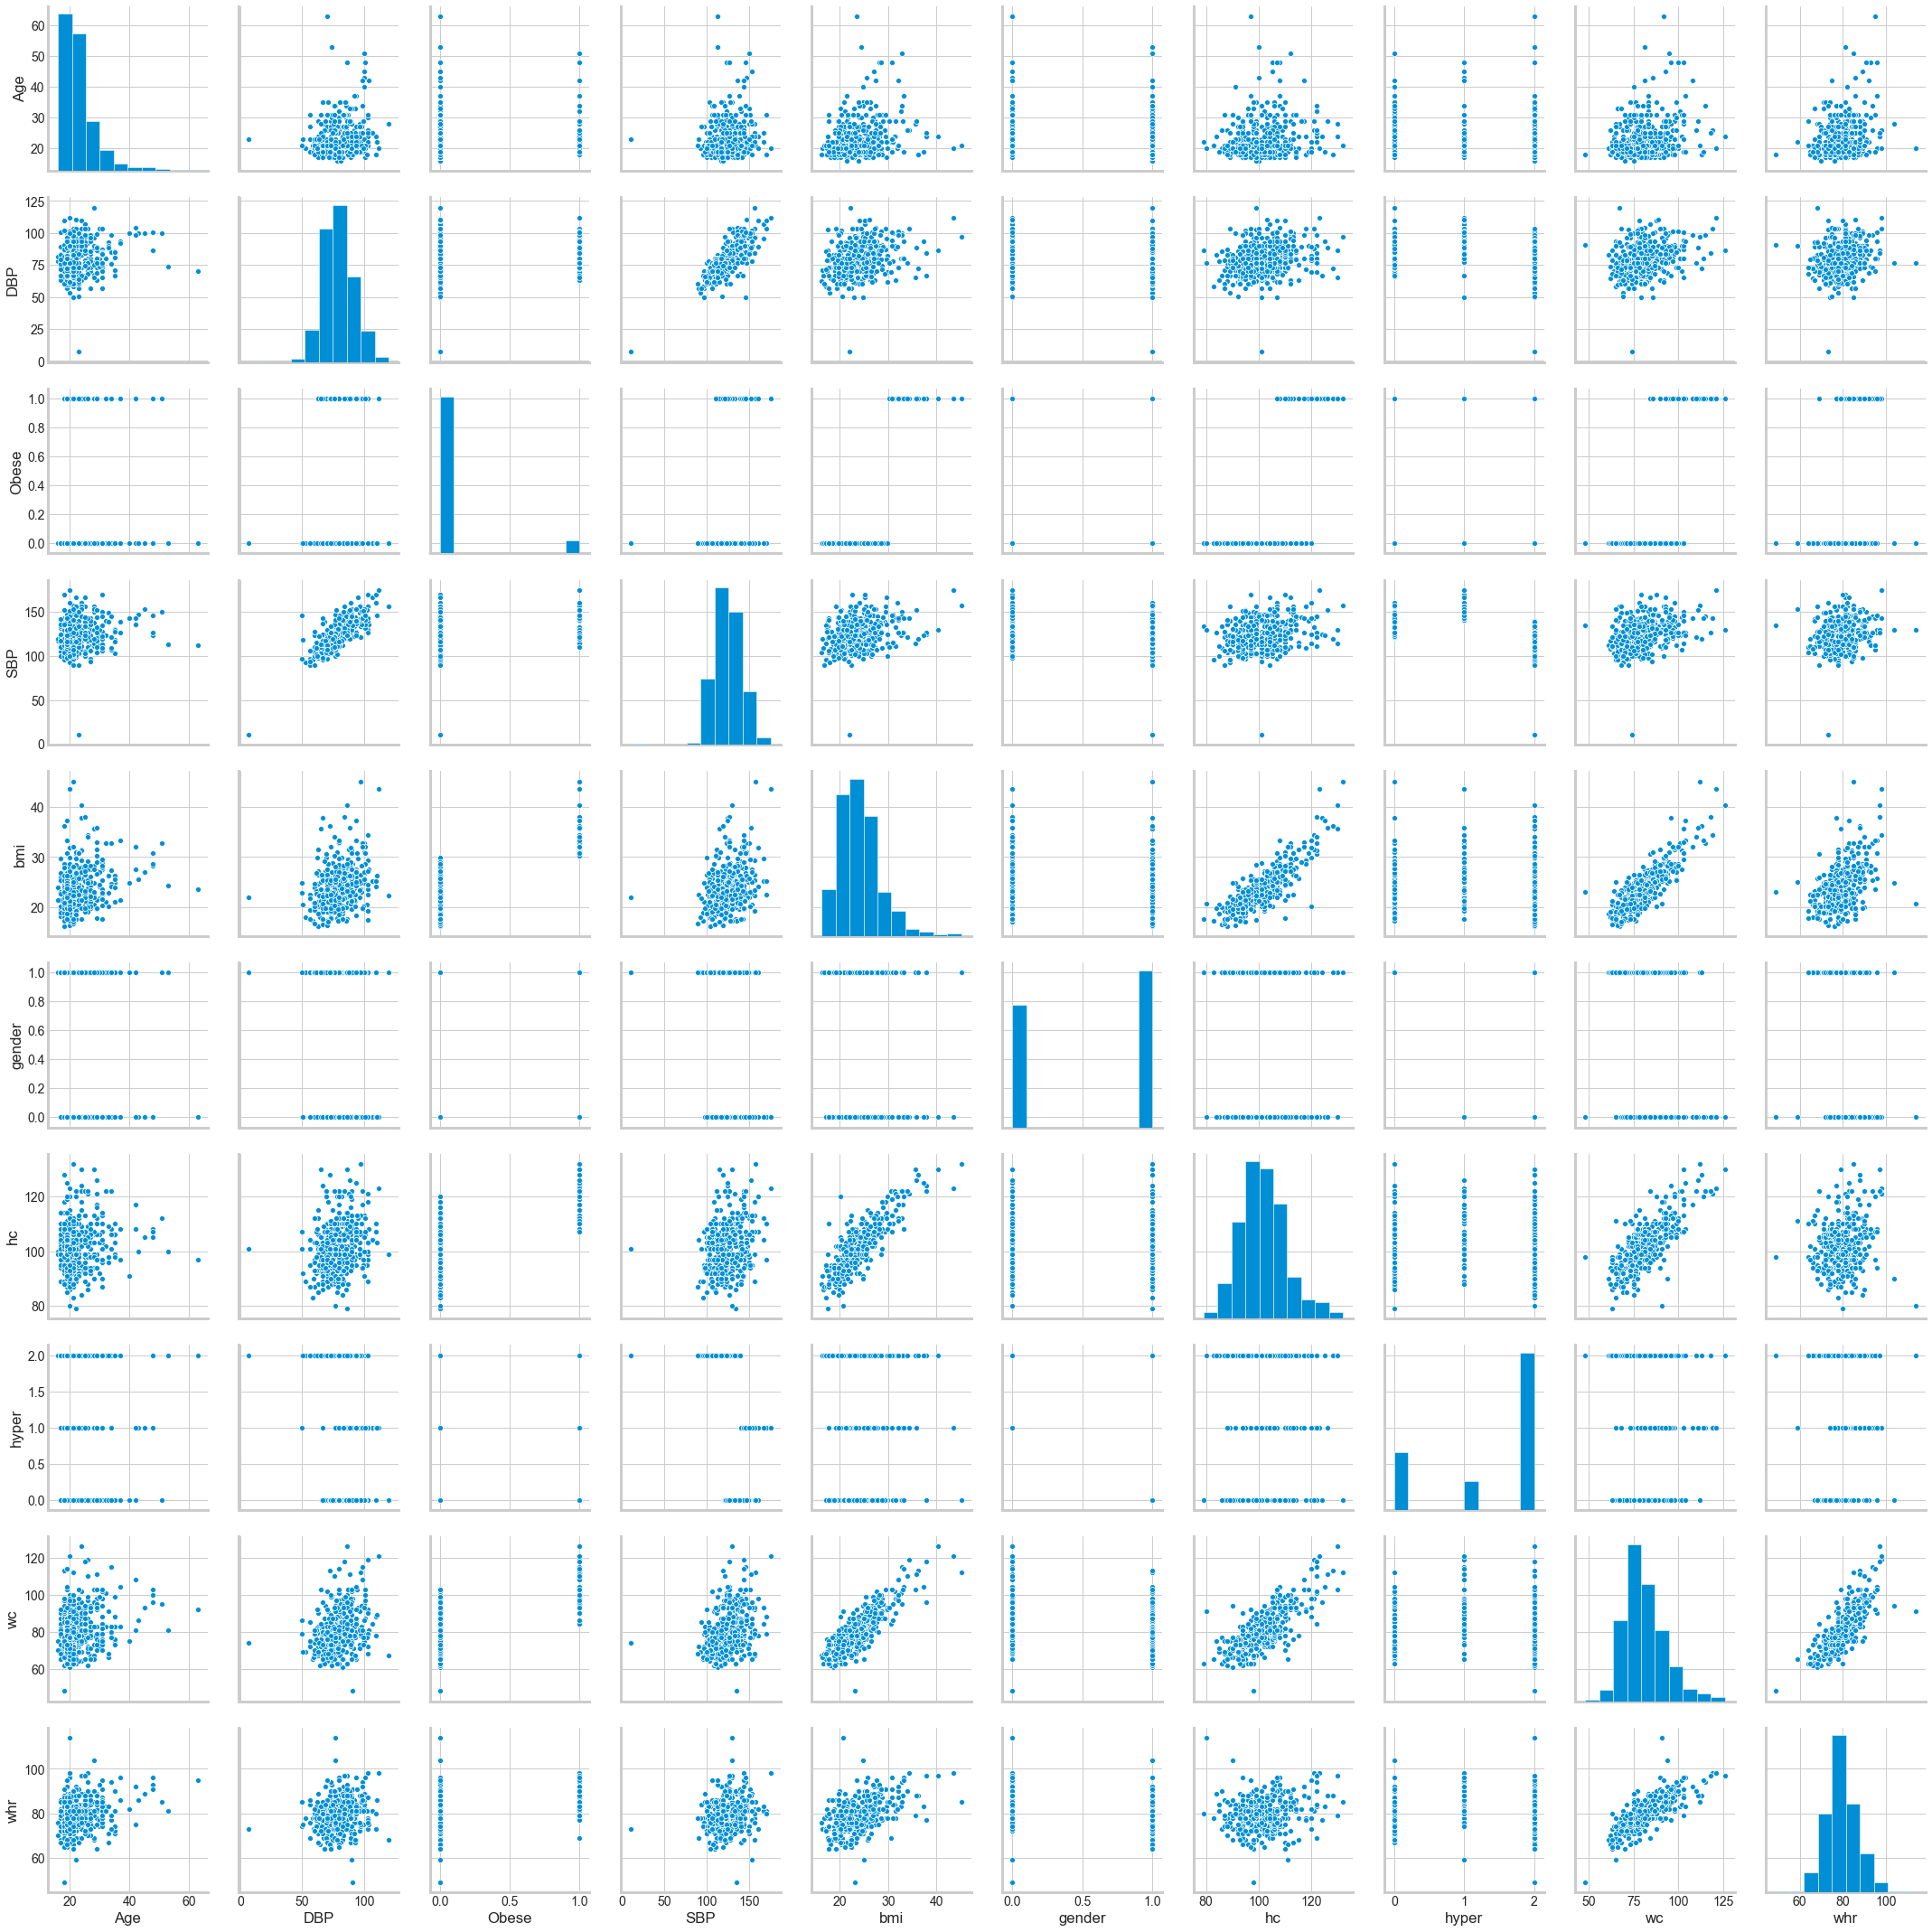

In [85]:
import seaborn as sns
sns.set_style("whitegrid")
sns.pairplot(hyper,size=3)

In [39]:
LR= LogisticRegression()
KNN= KNeighborsClassifier()
CART= DecisionTreeClassifier()
NB= GaussianNB()
SVM= SVC(kernel='linear',random_state=42)
MLP=MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=20,random_state=1)
DT=DecisionTreeClassifier(random_state=42)
RF=RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# feature selection 

In [40]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [41]:
sfs=SFS(RF,k_features =4,forward=True,floating=False,scoring='accuracy',verbose=2,cv =4,n_jobs= -1)
sfs.fit(X,y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   9 | elapsed:    9.6s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   10.7s finished

[2020-02-22 18:36:30] Features: 1/4 -- score: 0.7010052535865832[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:    2.8s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    3.1s finished

[2020-02-22 18:36:34] Features: 2/4 -- score: 0.9975[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    2.1s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    3.6s finished

[2020-02-22 18:36:37] Features: 3/4 -- score: 0.9975[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    1.5s remaini

SequentialFeatureSelector(clone_estimator=True, cv=4,
                          estimator=RandomForestClassifier(bootstrap=True,
                                                           class_weight=None,
                                                           criterion='gini',
                                                           max_depth=None,
                                                           max_features='auto',
                                                           max_leaf_nodes=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1,
                                                           min_samples_split=2,
                                                           min_weight_fraction_leaf=0.0,
                                                           n_es

In [8]:
print(sfs.k_feature_idx_)
print(sfs.k_feature_names_)
print('CV Score: ',sfs.k_score_)

(0, 3, 4, 5)
('Age', 'SBP', 'bmi', 'gender')
CV Score:  0.9823964437260052


In [9]:
X_rfe=hyper.drop(['hyper','Age', 'DBP', 'Obese','hc','whr'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_rfe,y,test_size=30,random_state=7)

In [10]:
rfe = RFE(SVM,n_features_to_select = 5).fit(X, y)
print(rfe.get_support())
print(X.columns)

[False False False  True  True  True False  True  True]
Index(['Age', 'DBP', 'Obese', 'SBP', 'bmi', 'gender', 'hc', 'wc', 'whr'], dtype='object')


In [11]:
X_sfs=hyper.drop(['hyper','whr','DBP','hc', 'wc'],axis=1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_sfs,y,test_size=30,random_state=7)

In [12]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y,test_size=30,random_state=7)

In [13]:
def model(model,X_tr, X_te, y_tr, y_te):
    model.fit(X_tr,y_tr)
    predict=model.predict(X_te)
    mae = np.mean(abs(predict - y_te))
    print('MAE = %0.4f' % mae)
    confusion_matrix(y_te, predict)
    print('accuracy score',accuracy_score(y_te,predict)*100)
    print('Classification report \n')
    print(classification_report(y_te,predict))
    print("Train acc: ",accuracy_score(y_tr,model.predict(X_tr)))
    print("test acc: ",accuracy_score(y_te,predict))
    

In [20]:
from sklearn.model_selection import cross_val_score
def crossV(model,X,y):
    print("Cross Validation: ")
    accuracy = cross_val_score(model, X, y, scoring='accuracy', cv = 10).mean() * 100
    print("Accuracy : " , accuracy)
    f1 = cross_val_score( model, X, y, cv=10, scoring='f1_macro').mean() * 100
    print("f1 : " , f1)

    recall = cross_val_score( model, X, y, cv=10, scoring='recall_macro').mean() * 100
    print("recall : " , recall)

    precision = cross_val_score( model, X, y, cv=10, scoring='precision_macro').mean() * 100
    print("precision : " , precision)


# LR

In [22]:
#before feature selection
model(LR,X_train2, X_test2, y_train2, y_test2)
crossV(LR,X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


MAE = 0.1333
accuracy score 93.33333333333333
Classification report 

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       1.00      1.00      1.00         4
           2       0.91      1.00      0.95        21

    accuracy                           0.93        30
   macro avg       0.97      0.87      0.90        30
weighted avg       0.94      0.93      0.93        30

Train acc:  0.9566395663956639
test acc:  0.9333333333333333
Cross Validation: 
Accuracy :  94.25641848523748


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

f1 :  92.8383109323098
recall :  92.06723646723647


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default mu

precision :  94.76638644454735


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [133]:
# sfs 
model(LR,X_train, X_test, y_train, y_test)

MAE = 0.3333
accuracy score 76.66666666666667
Classification report 

              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       0.00      0.00      0.00         4
           2       0.75      1.00      0.86        21

    accuracy                           0.77        30
   macro avg       0.58      0.47      0.48        30
weighted avg       0.69      0.77      0.70        30

Train acc:  0.8211382113821138
test acc:  0.7666666666666667


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [125]:
#rfe
model(LR,X_train1, X_test1, y_train1, y_test1)

MAE = 0.2333
accuracy score 83.33333333333334
Classification report 

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       1.00      0.25      0.40         4
           2       0.81      1.00      0.89        21

    accuracy                           0.83        30
   macro avg       0.94      0.62      0.68        30
weighted avg       0.87      0.83      0.80        30

Train acc:  0.8455284552845529
test acc:  0.8333333333333334


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


# SVM

In [21]:
#before feature selection
model(SVM,X_train2, X_test2, y_train2, y_test2)
crossV(SVM,X,y)

MAE = 0.0000
accuracy score 100.0
Classification report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00        21

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Train acc:  0.983739837398374
test acc:  1.0
Cross Validation: 
Accuracy :  96.22079589216945
f1 :  94.49942061344012
recall :  93.53618233618232
precision :  96.92927689594356


In [134]:
# sfs 
model(SVM,X_train, X_test, y_train, y_test)

MAE = 0.0000
accuracy score 100.0
Classification report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00        21

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Train acc:  0.986449864498645
test acc:  1.0


In [126]:
#rfe
model(SVM,X_train1, X_test1, y_train1, y_test1)

MAE = 0.0000
accuracy score 100.0
Classification report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00        21

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Train acc:  0.986449864498645
test acc:  1.0


# MLP

In [23]:
#before feature selection
model(MLP,X_train2, X_test2, y_train2, y_test2)
crossV(MLP,X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWar

MAE = 0.3667
accuracy score 76.66666666666667
Classification report 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.67      0.50      0.57         4
           2       0.78      1.00      0.88        21

    accuracy                           0.77        30
   macro avg       0.48      0.50      0.48        30
weighted avg       0.63      0.77      0.69        30

Train acc:  0.6558265582655827
test acc:  0.7666666666666667
Cross Validation: 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceW

Accuracy :  65.90757381258022


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Progra

f1 :  35.72570795830246


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceW

recall :  39.81025641025641


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anacond

precision :  37.454272454272456


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anacond

In [15]:
# sfs 
model(MLP,X_train, X_test, y_train, y_test)

MAE = 0.4333
accuracy score 70.0
Classification report 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         4
           2       0.72      1.00      0.84        21

    accuracy                           0.70        30
   macro avg       0.24      0.33      0.28        30
weighted avg       0.51      0.70      0.59        30

Train acc:  0.6341463414634146
test acc:  0.7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [16]:
#rfe
model(MLP,X_train1, X_test1, y_train1, y_test1)

MAE = 0.5000
accuracy score 56.666666666666664
Classification report 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.11      0.25      0.15         4
           2       0.76      0.76      0.76        21

    accuracy                           0.57        30
   macro avg       0.29      0.34      0.31        30
weighted avg       0.55      0.57      0.55        30

Train acc:  0.5528455284552846
test acc:  0.5666666666666667


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# naive bayes

In [24]:
#before feature selection
model(NB,X_train2, X_test2, y_train2, y_test2)
crossV(NB,X,y)

MAE = 0.8000
accuracy score 50.0
Classification report 

              precision    recall  f1-score   support

           0       0.36      1.00      0.53         5
           1       0.40      1.00      0.57         4
           2       1.00      0.29      0.44        21

    accuracy                           0.50        30
   macro avg       0.59      0.76      0.51        30
weighted avg       0.81      0.50      0.48        30

Train acc:  0.5040650406504065
test acc:  0.5
Cross Validation: 
Accuracy :  51.54942233632862
f1 :  59.21023279322179
recall :  74.33333333333334
precision :  74.63573979608135


In [136]:
# sfs 
model(NB,X_train, X_test, y_train, y_test)

MAE = 0.9667
accuracy score 40.0
Classification report 

              precision    recall  f1-score   support

           0       0.31      1.00      0.48         5
           1       0.36      1.00      0.53         4
           2       1.00      0.14      0.25        21

    accuracy                           0.40        30
   macro avg       0.56      0.71      0.42        30
weighted avg       0.80      0.40      0.33        30

Train acc:  0.4634146341463415
test acc:  0.4


In [137]:
#rfe
model(NB,X_train1, X_test1, y_train1, y_test1)

MAE = 0.9000
accuracy score 43.333333333333336
Classification report 

              precision    recall  f1-score   support

           0       0.33      1.00      0.50         5
           1       0.36      1.00      0.53         4
           2       1.00      0.19      0.32        21

    accuracy                           0.43        30
   macro avg       0.57      0.73      0.45        30
weighted avg       0.80      0.43      0.38        30

Train acc:  0.46883468834688347
test acc:  0.43333333333333335


# Knn

In [25]:
#before feature selection
model(KNN,X_train2, X_test2, y_train2, y_test2)
crossV(KNN,X,y)

MAE = 0.1667
accuracy score 90.0
Classification report 

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       1.00      0.75      0.86         4
           2       0.88      1.00      0.93        21

    accuracy                           0.90        30
   macro avg       0.96      0.78      0.85        30
weighted avg       0.91      0.90      0.89        30

Train acc:  0.8319783197831978
test acc:  0.9
Cross Validation: 
Accuracy :  76.07381258023108
f1 :  68.59684024153394
recall :  68.56210826210827
precision :  74.52090312157455


In [138]:
# sfs 
model(KNN,X_train, X_test, y_train, y_test)

MAE = 0.3333
accuracy score 83.33333333333334
Classification report 

              precision    recall  f1-score   support

           0       0.50      0.60      0.55         5
           1       1.00      1.00      1.00         4
           2       0.90      0.86      0.88        21

    accuracy                           0.83        30
   macro avg       0.80      0.82      0.81        30
weighted avg       0.85      0.83      0.84        30

Train acc:  0.8590785907859079
test acc:  0.8333333333333334


In [139]:
#rfe
model(KNN,X_train1, X_test1, y_train1, y_test1)

MAE = 0.3000
accuracy score 80.0
Classification report 

              precision    recall  f1-score   support

           0       0.40      0.40      0.40         5
           1       0.67      0.50      0.57         4
           2       0.91      0.95      0.93        21

    accuracy                           0.80        30
   macro avg       0.66      0.62      0.63        30
weighted avg       0.79      0.80      0.79        30

Train acc:  0.8455284552845529
test acc:  0.8


# DecisionTree

In [26]:
#before feature selection
model(DT,X_train2, X_test2, y_train2, y_test2)
crossV(DT,X,y)

MAE = 0.0000
accuracy score 100.0
Classification report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00        21

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Train acc:  1.0
test acc:  1.0
Cross Validation: 
Accuracy :  100.0
f1 :  100.0
recall :  100.0
precision :  100.0


In [140]:
# sfs 
model(DT,X_train, X_test, y_train, y_test)

MAE = 0.0000
accuracy score 100.0
Classification report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00        21

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Train acc:  1.0
test acc:  1.0


In [141]:
#rfe
model(DT,X_train1, X_test1, y_train1, y_test1)

MAE = 0.0000
accuracy score 100.0
Classification report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00        21

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Train acc:  1.0
test acc:  1.0


# Random Forest

In [36]:
#before feature selection
model(RF,X_train2, X_test2, y_train2, y_test2)
crossV(RF,X,y)

MAE = 0.0000
accuracy score 100.0
Classification report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00        21

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Train acc:  1.0
test acc:  1.0
Cross Validation: 
Accuracy :  99.51219512195122
f1 :  99.33073424301494
recall :  99.0
precision :  99.76190476190476


In [37]:
# sfs 
model(RF,X_train, X_test, y_train, y_test)

MAE = 0.0000
accuracy score 100.0
Classification report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00        21

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Train acc:  1.0
test acc:  1.0


In [38]:
#rfe
model(RF,X_train1, X_test1, y_train1, y_test1)

MAE = 0.0000
accuracy score 100.0
Classification report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00        21

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Train acc:  1.0
test acc:  1.0


# CART

In [30]:
#before feature selection
model(CART,X_train2, X_test2, y_train2, y_test2)
crossV(CART,X,y)

MAE = 0.0000
accuracy score 100.0
Classification report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00        21

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Train acc:  1.0
test acc:  1.0
Cross Validation: 
Accuracy :  100.0
f1 :  100.0
recall :  100.0
precision :  100.0


In [29]:
# sfs 
model(CART,X_train, X_test, y_train, y_test)

MAE = 0.0000
accuracy score 100.0
Classification report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00        21

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Train acc:  1.0
test acc:  1.0


In [159]:
#rfe
model(CART,X_train1, X_test1, y_train1, y_test1)

MAE = 0.0000
accuracy score 100.0
Classification report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00        21

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Train acc:  1.0
test acc:  1.0
